# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key as key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Get city Lon Lat from openweathermap.org and store
city_latlon_df = []

for i, city in enumerate(cities):
    try:
        city_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={key}"
        city_info = req.get(city_url).json()
        city_latlon_df.append([city, city_info[0]['lat'], city_info[0]['lon']])
    except Exception as err:
        print(f"{city} city not found. Skipping...")
        pass

atafu village city not found. Skipping...
yigo village city not found. Skipping...
namdrik city not found. Skipping...
tsiombe city not found. Skipping...
muroto-misakicho city not found. Skipping...
utrik city not found. Skipping...
palikir - national government center city not found. Skipping...
severo-yeniseyskiy city not found. Skipping...
polyarnyy city not found. Skipping...
haiku-pauwela city not found. Skipping...
yulinshi city not found. Skipping...
sonsorol village city not found. Skipping...
bikenibeu village city not found. Skipping...
dalandzadgad city not found. Skipping...
ocean pointe city not found. Skipping...
kandyagash city not found. Skipping...
betio village city not found. Skipping...
torghay city not found. Skipping...
minas de marcona city not found. Skipping...
shantobe city not found. Skipping...
alaghsas city not found. Skipping...
tal'menka city not found. Skipping...
katsuren-haebaru city not found. Skipping...
port saint john's city not found. Skipping...

In [4]:
# Create a city, lat, lon, df to use in openweathermap url
city_lat_lon_df = pd.DataFrame(city_latlon_df, columns = ['city' , 'lat', 'lon'])

In [5]:
# API CALL Format: https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # print(city)

    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    try:
        lat = city_lat_lon_df.loc[city_lat_lon_df['city'] == city, 'lat'].values[0]
        lon = city_lat_lon_df.loc[city_lat_lon_df['city'] == city, 'lon'].values[0]
        city_url = f"{url}?lat={lat}&lon={lon}&appid={key}"
    except Exception as err:
        print(f"{city} city location failed. Skipping...")
        pass
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = req.get(city_url).json()
        time.sleep(1)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']  - 273.15 # <- Kelvin to Celsius
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(city_weather['dt']) # <- UNIX timestamp to date conversion

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print(f"{city} city not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dompu
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | bukhara
atafu village city location failed. Skipping...
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | puerto baquerizo moreno
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | aur
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | kievka
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | vila velha
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | howrah
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | mosjoen
Processing Record 19 of Set 1 | vilyuchinsk
Processing Record 20 of Set 1 | mersing
Processing Record 21 of Set 1 | amahai
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dompu,-8.5356,118.4622,25.05,97,88,0.80,ID,2024-04-24 17:55:20
1,ust-nera,64.5664,143.2378,1.93,93,99,2.45,RU,2024-04-24 17:55:22
2,bukhara,39.7676,64.4231,22.80,32,79,4.54,UZ,2024-04-24 17:55:23
3,atafu village,39.7676,64.4231,22.80,32,79,4.54,UZ,2024-04-24 17:55:23
4,puerto baquerizo moreno,-0.9026,-89.6102,25.50,85,17,3.14,EC,2024-04-24 17:55:27


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dompu,-8.5356,118.4622,25.05,97,88,0.80,ID,2024-04-24 17:55:20
1,ust-nera,64.5664,143.2378,1.93,93,99,2.45,RU,2024-04-24 17:55:22
2,bukhara,39.7676,64.4231,22.80,32,79,4.54,UZ,2024-04-24 17:55:23
3,atafu village,39.7676,64.4231,22.80,32,79,4.54,UZ,2024-04-24 17:55:23
4,puerto baquerizo moreno,-0.9026,-89.6102,25.50,85,17,3.14,EC,2024-04-24 17:55:27


### Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

#### Latitude Vs. Temperature

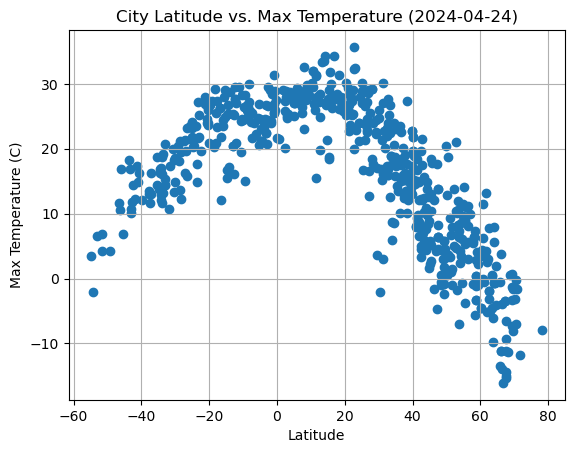

In [10]:
# Build scatter plot for latitude vs. temperature
dt = city_date.strftime('%Y-%m-%d')
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

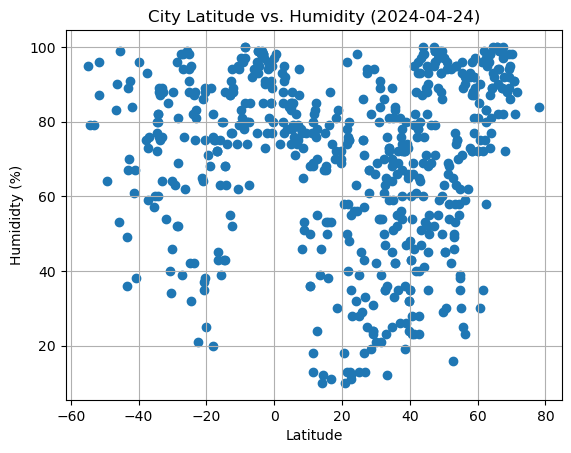

In [11]:
# Build the scatter plots for latitude vs. humidity
dt = city_date.strftime('%Y-%m-%d')
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Humididty (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

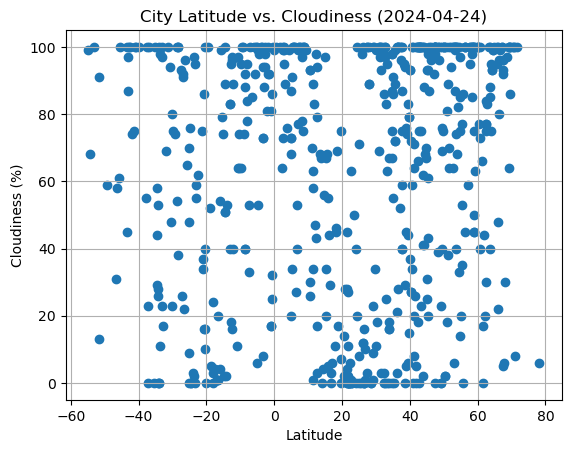

In [12]:
# Build the scatter plots for latitude vs. cloudiness
dt = city_date.strftime('%Y-%m-%d')
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

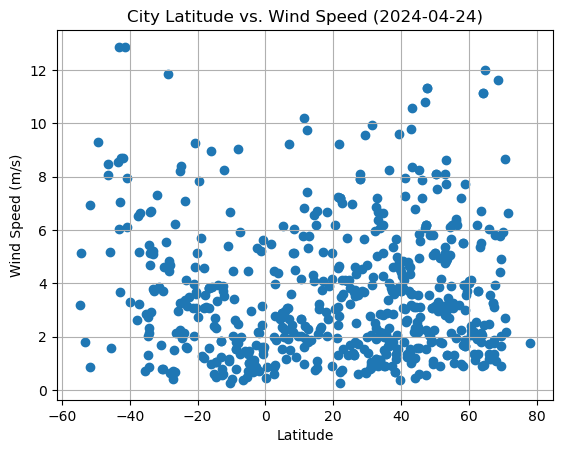

In [13]:
# Build the scatter plots for latitude vs. wind speed
dt = city_date.strftime('%Y-%m-%d')
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


#### Linear Regression function

In [14]:
# Define a function to create Linear Regression plots
# Calculate the correlation coefficient and a linear regression model 

def weather_plot(df: pd.DataFrame, xAxis: str, yAxis: str, xLabel: str, yLabel: str, annotateXY: tuple):
    
    # ARGUMENTS -----------------------------------------
    # df = DataFrame containing x and y axis plot values
    # xAxis = DataFrame x axis column name
    # yAxis = DataFrame y axis column name
    # xLabel = Plot x axis column label
    # xLabel = Plot y axis column label
    # annotateXY = Plot xy location of the annotation
    #----------------------------------------------------
    
    rval = st.pearsonr(df[yAxis], df[xAxis])[0]
    print(f'The r-value is: {rval}')
    
    # Add the linear regression equation and line to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[xAxis], df[yAxis])
    regress_values = df[xAxis] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(df[xAxis], df[yAxis])
    plt.plot(df[xAxis],regress_values,"r-")
    plt.annotate(line_eq,annotateXY,fontsize=15,color="red")
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()
    

#### Hemisphere DataFrames

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ust-nera,64.5664,143.2378,1.93,93,99,2.45,RU,2024-04-24 17:55:22
2,bukhara,39.7676,64.4231,22.80,32,79,4.54,UZ,2024-04-24 17:55:23
3,atafu village,39.7676,64.4231,22.80,32,79,4.54,UZ,2024-04-24 17:55:23
10,kievka,54.3963,62.8787,3.53,58,100,6.11,RU,2024-04-24 17:55:38
15,howrah,22.5736,88.3251,29.03,55,1,0.75,IN,2024-04-24 17:55:47


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dompu,-8.5356,118.4622,25.05,97,88,0.80,ID,2024-04-24 17:55:20
4,puerto baquerizo moreno,-0.9026,-89.6102,25.50,85,17,3.14,EC,2024-04-24 17:55:27
5,blackmans bay,-43.0047,147.3180,10.16,67,97,7.06,AU,2024-04-24 17:55:29
6,aur,-3.7361,104.2317,23.36,99,100,0.68,ID,2024-04-24 17:55:30
7,waitangi,-35.2705,174.0805,18.71,60,100,2.84,NZ,2024-04-24 17:55:32


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8775550189888679


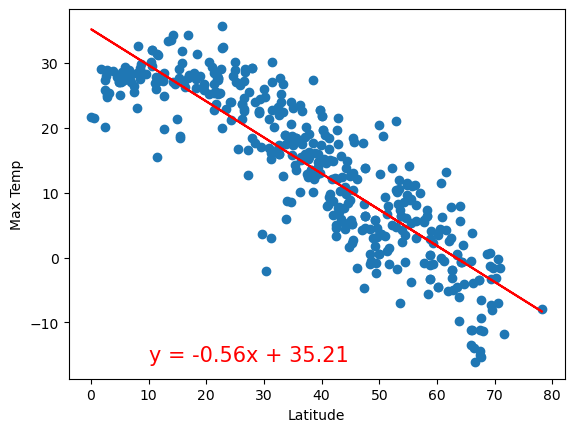

In [17]:
# Linear regression on Northern Hemisphere
weather_plot(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp', (10,-16))

The r-value is: 0.7984059035454174


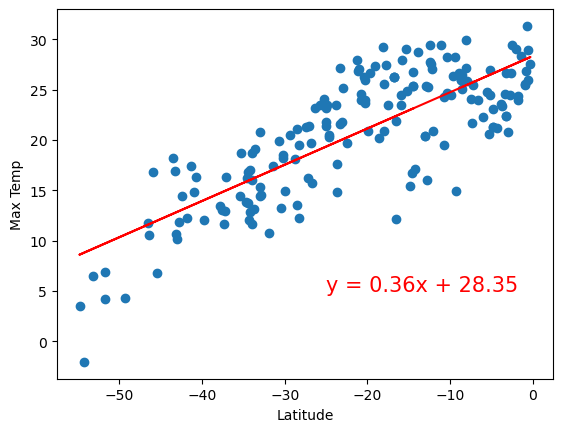

In [18]:
# Linear regression on Southern Hemisphere
weather_plot(southern_hemi_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp', (-25,5))

**The linear relationship of Temperature vs. Latitude based on random cities across the globe:** 
 - The linear relationship shows a strong relationship of:
     * Higher temperatures near latitude zero.
     * Lower temperatures as latitudes distance from zero.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25433914379478784


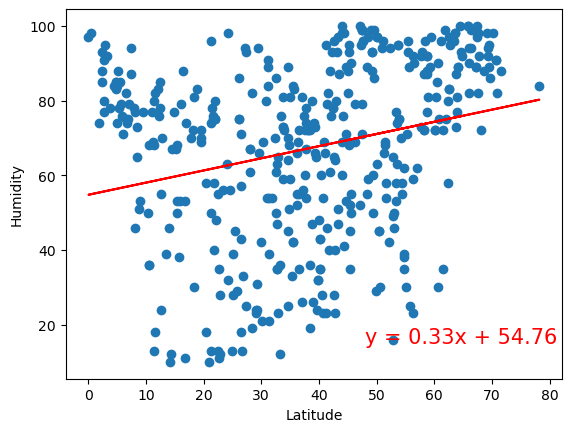

In [19]:
# Northern Hemisphere
weather_plot(northern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity', (48,15))

The r-value is: 0.2235307011023688


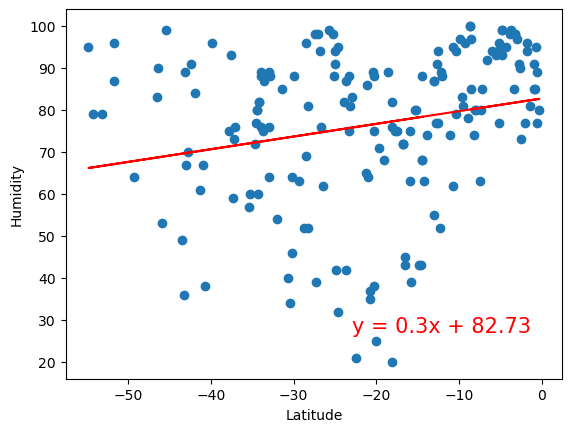

In [20]:
# Southern Hemisphere
weather_plot(southern_hemi_df, 'Lat', 'Humidity', 'Latitude', 'Humidity', (-23,27))

**The linear relationship of Humidity vs. Latitude based on random cities across the globe:** 
 - The linear relationship shows a small but consistent relationship:
     * For both hemispheres, the humidity rises as the latitude approaches north.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1906391451671705


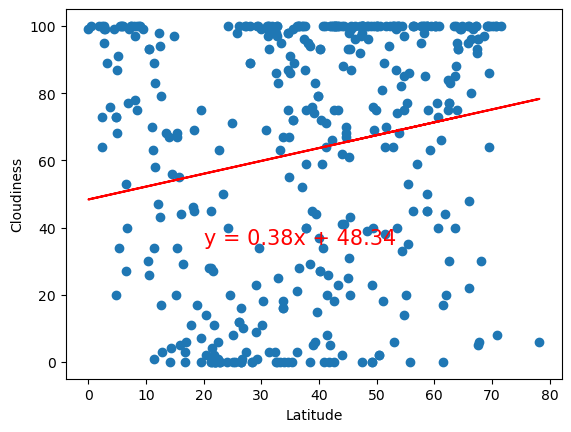

In [21]:
# Northern Hemisphere
weather_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', (20,35))

The r-value is: 0.04602922564873295


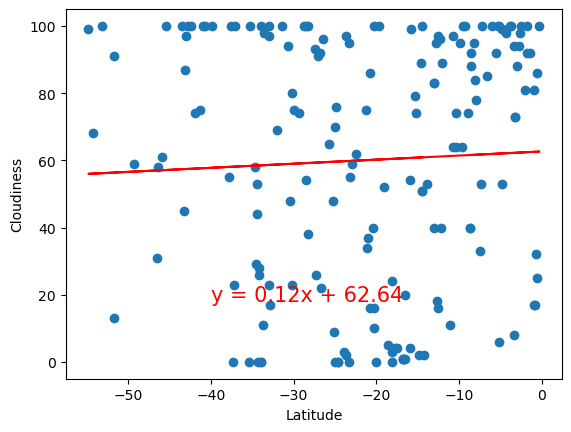

In [28]:
# Southern Hemisphere
weather_plot(southern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', (-40,18))

**The linear relationship of Cloudiness vs. Latitude based on random cities across the globe:** 
 - The linear relationship shows almost no correlation for the southern hemisphere:
     * For both hemispheres, the cloudiness rises as the latitude approaches north.
     * We could possibly see a higher correlation of humidity to cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06754664818402975


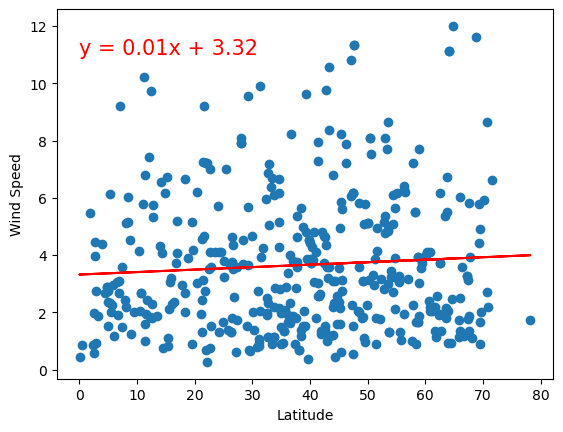

In [27]:
# Northern Hemisphere
weather_plot(northern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', (0,11))

The r-value is: -0.43768481309201124


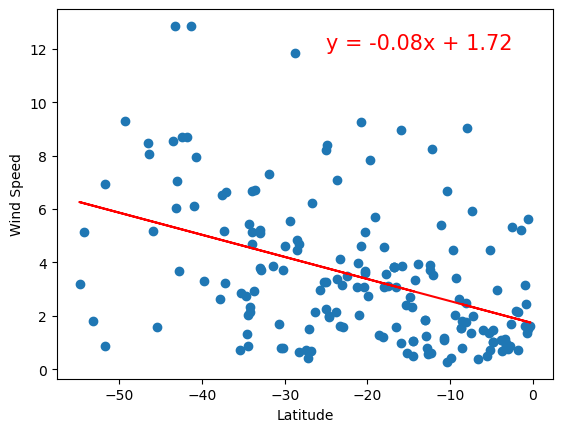

In [24]:
# Southern Hemisphere
weather_plot(southern_hemi_df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', (-25,12))

**The linear relationship of Wind Speed vs. Latitude based on random cities across the globe::**
 - The linear relationship shows almost no correlation for the norther hemisphere:
     * For both hemispheres, the wind speed decreases as the latitude approaches equator.